# Лабораторная работа по нейроинформатике №1

Выполнил: _Коростелев Д.В._ Группа: _М8О-408Б-18_ Вариант: _11_

#### Импортируем пакеты

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

#### Функции

In [2]:
def plot_points(X, Y):
    for i in range(len(X)):
        [x, y] = X[i]
        plt.plot(x, y, 'ro', color=(1, 0.3, 0.3) if Y[i] == 0 else (0.3,0.3,1))
        
def plot_line(W):
    def calc_y(x):
        return -W[1]*x/W[2] - W[0]/W[2]
    pts = np.array([-7,7])
    plt.plot(pts, calc_y(pts), "g")
    
def plot_fourth_point_group(X, Y):
    for i in range(len(X)):
        def choose_color(y):
            if y == [0, 0]:
                return (1, 0.3, 0.3)
            elif y == [0, 1]:
                return (0.3, 0.3, 1)
            elif y == [1, 0]:
                return (1, 0.3, 1)
            else:
                return (0.3, 0.3, 0.3)
        [x, y] = X[i]
        plt.plot(x, y, 'ro', color=choose_color(Y[i]))

def plot_two_lines(W):
    plot_line(np.transpose(W)[0])
    plot_line(np.transpose(W)[1])

## Однослойный персептрон

#### Входные значения

In [3]:
x1 = [[-3.9, -0.1], [4.5, -1.6], [0.8, -2.8], [2.5, -2.5], [0, 1.9], [3.9, 4.5]]
y1 = [0, 1, 0, 0, 0, 1]

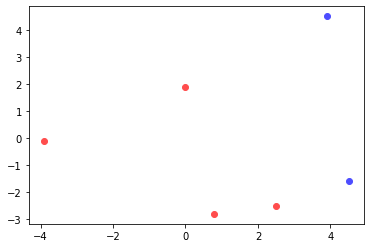

In [4]:
plot_points(x1,y1)

#### Реализация

In [5]:
class MyLinearSingle:
    def __init__(self):
        pass

    def forward(self, x):
        return np.dot(x, self.w)

    def score(self, x, y):
        return np.sum(np.equal(x, y)) / len(y)

    def active_func(self, x):
        return 0 if x < 0 else 1

    def train(self, X, Y, epochs=100, step=0.1):
        self.X = [[1, *elx] for elx in X]
        self.w = np.random.rand(len(self.X[0]))
        for epoch in range(epochs):
            for elx, ely in zip(self.X, Y):
                resy = self.forward(elx)
                actr = self.active_func(resy)
                diff = ely-actr
                if(diff != 0):
                    self.w = self.w + np.multiply(elx, (diff*step))
        return self
                
    def score(self, X, Y):
        self.X = [[1, *elx] for elx in X]
        cnt = 0.0
        for elx, ely in zip(self.X, Y):
            if(self.active_func(self.forward(elx)) == ely):
                cnt = cnt + 1.0
        return cnt / len(X)

#### Результаты

Score:   1.0
Weights: [-0.60273994  0.30204705  0.27259582]


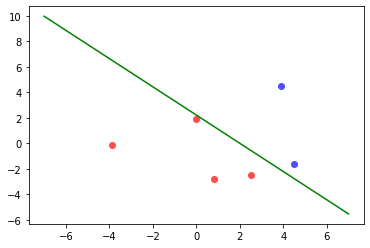

In [6]:
perceptron = MyLinearSingle().train(x1, y1)
print(f"Score:   {perceptron.score(x1, y1)}")
print(f"Weights: {perceptron.w}")
plot_points(x1,y1)
plot_line(perceptron.w)

#### Тестирование

Score:   1.0
Weights: [ 0.510794   -0.73238903  1.11112708]


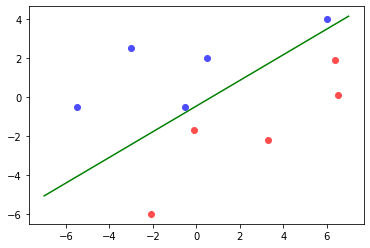

In [7]:
tx1 = [[-5.5, -0.5], [-3, 2.5], [-0.5, -0.5], [0.5, 2.0], [6.0, 4.0],
      [-2.1, -6], [-0.1, -1.7], [3.3, -2.2], [6.4, 1.9], [6.5, 0.1]]
ty1 = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

test_perceptron = MyLinearSingle().train(tx1, ty1)
print(f"Score:   {test_perceptron.score(tx1, ty1)}")
print(f"Weights: {test_perceptron.w}")

plot_points(tx1,ty1)
plot_line(test_perceptron.w)

## Двуслойный персептрон

#### Входные значения

In [8]:
x2 = [[3.9, -4.1], [-4.6, 0.5],
      [2.7, -1.9], [-3.3, -1.7],
      [-2.9, 0.1], [4,1.2],
      [-4, -1.1], [-4.5, 0]]
y2 = [[0, 1], [1, 0],
      [0, 1], [0, 0],
      [1, 0], [1, 1],
      [0, 0], [1, 0]]

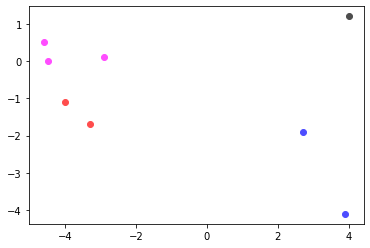

In [9]:
plot_fourth_point_group(x2, y2)

#### Реализация

In [10]:
class MyLinear:
    def __init__(self):
        pass

    def forward(self, x):
        return self.active_func(np.dot(x, self.w))

    def score(self, x, y):
        return np.sum(np.equal(x, y)) / len(y)

    def active_func(self, Y):
        return np.array([0 if y < 0 else 1 for y in Y])

    def train(self, X, Y, epochs=100, step=0.01):
        self.X = [[1, *elx] for elx in X]
        self.w = np.random.rand(len(self.X[0]), len(Y[0])).tolist()
        self.wshape = (len(self.X[0]), len(Y[0]))
        for epoch in range(epochs):
            for elx, ely in zip(self.X, Y):
                actr = self.forward(elx)
                diff = ely-actr
                if(np.count_nonzero(diff) > 0):
                    for i in range(self.wshape[0]):
                        for j in range(self.wshape[1]):
                            self.w[i][j] = self.w[i][j] + step*elx[i]*diff[j]
        return self
                
    def score(self, X, Y):
        self.X = [[1, *elx] for elx in X]
        cnt = 0.0
        for elx, ely in zip(self.X, Y):
            if(np.array_equal(self.forward(elx), ely)):
                cnt = cnt + 1.0
        return cnt / len(X)

#### Результаты

Score:   1.0
Weights: [[0.8247619949618625, 0.3949243059481852], [0.005297122940716603, 0.7281947017298694], [0.8118101562948252, 0.7804334036011527]]


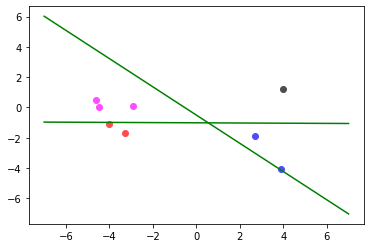

In [11]:
second_perceptron = MyLinear().train(x2, y2)
print(f"Score:   {second_perceptron.score(x2, y2)}")
print(f"Weights: {second_perceptron.w}")

plot_fourth_point_group(x2, y2)
plot_two_lines(second_perceptron.w)

#### Тестирование

Score:   0.5
Weights: [[0.024717630456415188, 0.5599921132654287], [-0.11147454217466224, -0.2021214264743733], [-0.061726751173939304, 0.20673940532187368]]


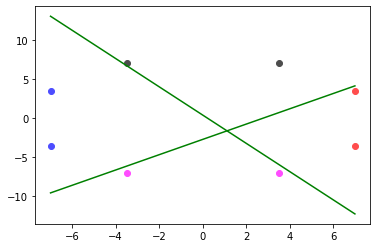

In [12]:
tx2 = [[-3.5, 7], [3.5, 7.0],
      [-7, 3.5], [-7, -3.5],
      [-3.5, -7], [3.5, -7.0],
      [7, 3.5], [7, -3.5]]
ty2 = [[1, 1], [1, 1],
      [0, 1], [0, 1],
      [1, 0], [1, 0],
      [0, 0], [0, 0]]

second_test_perceptron = MyLinear().train(tx2, ty2)
print(f"Score:   {second_test_perceptron.score(tx2, ty2)}")
print(f"Weights: {second_test_perceptron.w}")

plot_fourth_point_group(tx2, ty2)
plot_two_lines(second_test_perceptron.w)